In [1]:
import geopandas as gpd
from shapely.geometry import LineString
import more_itertools 

In [2]:
from more_itertools import random_permutation

def plot_random_colors(gdf, figsize=10):
    """Plot geodataframe with different colors for each geometry (hopefully)
    """
    gdf['__index'] = random_permutation(list(gdf.index))
    gdf.plot(column='__index', figsize=(figsize,200))
    gdf.drop('__index', axis=1)

### Defining a geometry

In [3]:
points = ((1,1), (2,0), (2,1), (0,1))
lines = list(LineString((a,b)) for a,b in more_itertools.windowed(points, 2))
gdf = gpd.GeoDataFrame(geometry=lines)
plot_random_colors(gdf, figsize=5)


### Trying to convert the triangle to polygon

In [8]:
# With polygonize
from shapely.ops import polygonize

polys = list(polygonize(gdf.geometry))
polys

[]

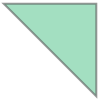

In [9]:
# Applying gpd's unary_union before polygonize
p = list(polygonize(gdf.geometry.unary_union))[0]
p